# 계층적 군집화

**계층적 군집화(hierachical clustering)**는 여러개의 군집 중에서 가장 유사도가 높은 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 방법을 말한다. **합체 군집화(agglomerative clustering)**라고도 한다. 가장 처음에는 모든 군집이 하나의 데이터만을 가진다. 따라서 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 된다.

### 군집간의 거리 측정

계측정 군집화를 하려면 우선 모든 군집 간에 거리를 측정해야 한다. 군집 간의 거리를 측정하는 방법에는 계층적 방법에 의존하지 않는 비계층적 방법과 이미 이전 단계에서 계층적 방법으로 군집이 합쳐진 적인 있다는 가정을 하는 계층적 방법 두 가지가 있다.

### 비계층적 거리 측정법

비계층적 거리측정법은 계층적 군집화가 아니더라도 모든 경우에 사용할 수 있는 거리 측정 방법이다. 중심거리, 단일거리, 완전거리, 평균거리 등이 있다. 다음에 설명할 계층적 거리측정법에 비해 계산량이 많은 단점이 있다.

#### 중심(centroid)거리

두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 정의한다.

$$
d(u,v) = \|c_u - c_v\|_2
$$

여기에서 $d(u,v)$는 군집 $u$와 군집 $v$ 사이의 거리를 뜻한다. 또한 $c_u$와 $c_v$는 각각 두 군집 $u$와 $v$의 중심점이다. 군집의 중심점은 그 클러스에 포함된 모든 데이터의 평균을 사용한다.

$$
c_u = \dfrac{1}{|u|}\sum_i u_i
$$

이 식에서 $|\cdot|$ 기호는 군집의 원소의 갯수를 말한다. 


#### 단일(single)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 가장 작은 값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다.

$$
d(u,v) = \min(d(u_i,v_j))
$$

#### 완전(complete)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 가장 큰 값을 구한다. 최장 거리(Farthest Point) 방법이라고도 한다.

$$
d(u,v) = \max(d(u_i,v_j))
$$

#### 평균(average)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 평균을 구한다. $|u|$와 $|v|$는 각각 두 군집의 원소의 갯수를 뜻한다.

$$
   d(u,v) = \sum_{i,j} \frac{d(u_i, v_j)}{|u||v|}
$$


### 계층적 거리 측정법

계층적 거리 측정법은 계층적 군집화에서만 사용할 수 있는 방법이다. 즉, 이전 단계에서 이미 어떤 두 개의 군집이 하나로 합쳐진 적이 있다고 가정하여 이 정보를 사용하는 측정법이다. 비계층적 거리 측정법에 비해 계산량이 적어 효율적이다.

#### 중앙값(median)거리

이 방법은 중심거리 방법의 변형이다. 중심거리 방법처럼 군집의 중심점의 거리를 군집간의 거리라고 한다. 하지만 군집의 중심점을 계산하는 방법이 다르다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

군집 $u$의 중심점은 새로 계산하지 않고 원래 군집의 두 군집의 중심점의 평균을 사용한다.

$$
c_u = \dfrac{1}{2}(c_s + s_t)
$$

따라서 해당 군집의 모든 데이터를 평균하여 중심점을 구하는 것 보다 계산이 빠르다.

#### 가중(weighted)거리

가중거리를 사용하려면 원래 어떤 두 개의 군집이 합쳐져서 하나의 군집이 만들어졌는지 알아야 한다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

이 군집 $u$와 다른 군집 $v$ 사이의 거리는 군집 $u$를 구성하는 원래 군집 $s$, $t$와 $v$ 사이의 두 거리의 평균을 사용한다.

$$
   d(u,v) = \dfrac{1}{2}(d(s,v) + d(t,v))
$$


In [1]:
%load_ext tikzmagic

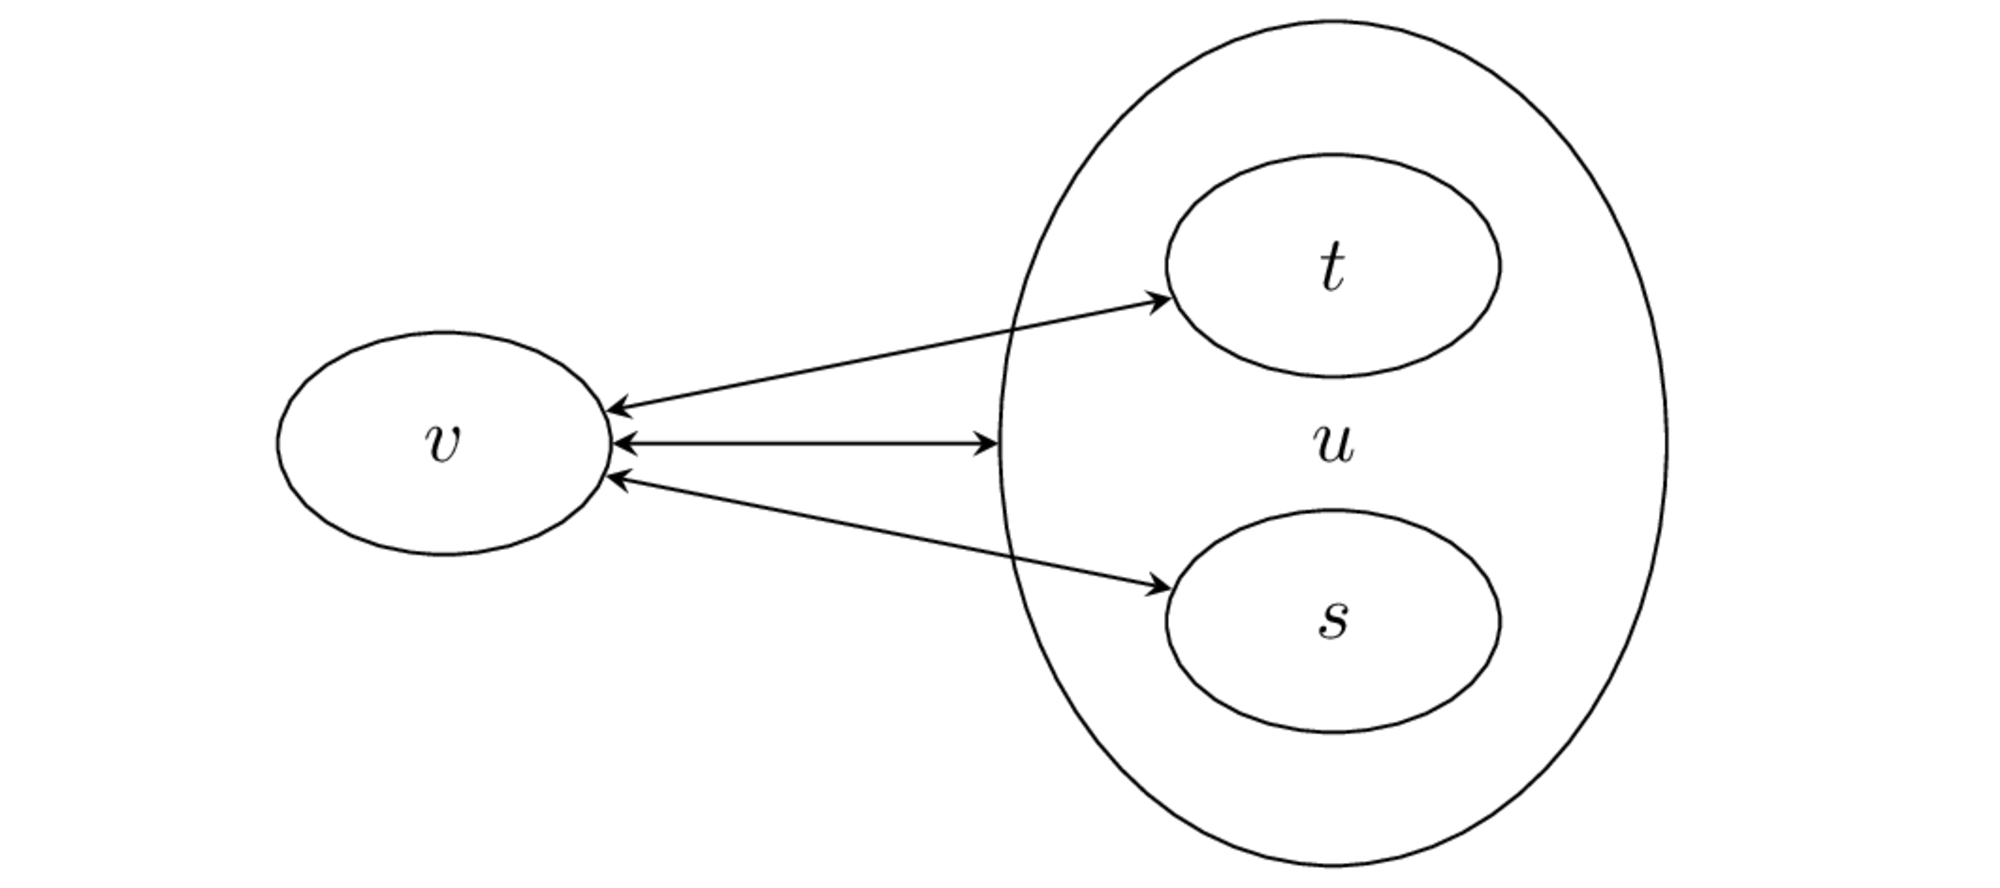

In [2]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (left bottom) at (1, 1);
\coordinate (right top) at (10, 5);
\fill[white, use as bounding box] (left bottom) rectangle (right top);
\draw[help lines, white] (left bottom) grid (right top);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}
\tikzset{node/.style={draw, ellipse, minimum width=1.5cm, minimum height=1cm}}

\node[node] at (3,3) (v) {$v$};
\node[node] at (7,3.8) (t) {$t$};
\node[node] at (7,2.2) (s) {$s$};
\node[node, minimum width=3cm,, minimum height=3.8cm] at (7,3) (u) {$u$};
\draw[<->] (v) -- (u);
\draw[<->] (v) -- (s);
\draw[<->] (v) -- (t);

#### 와드(Ward)거리

와드거리는 가중거리방법의 변형이다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

이 군집 $u$와 다른 군집 $v$ 사이의 거리를 구하는데 있어서 군집 $u$를 구성하는 원래 군집 $s$, $t$와 $v$ 사이의 거리를 사용하는 것은 가중거리 방법과 같지만 원래의 두 군집 $s$, $t$가 너무 가까우면 $v$와의 거리가 더 먼것으로 인식한다. 

$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$

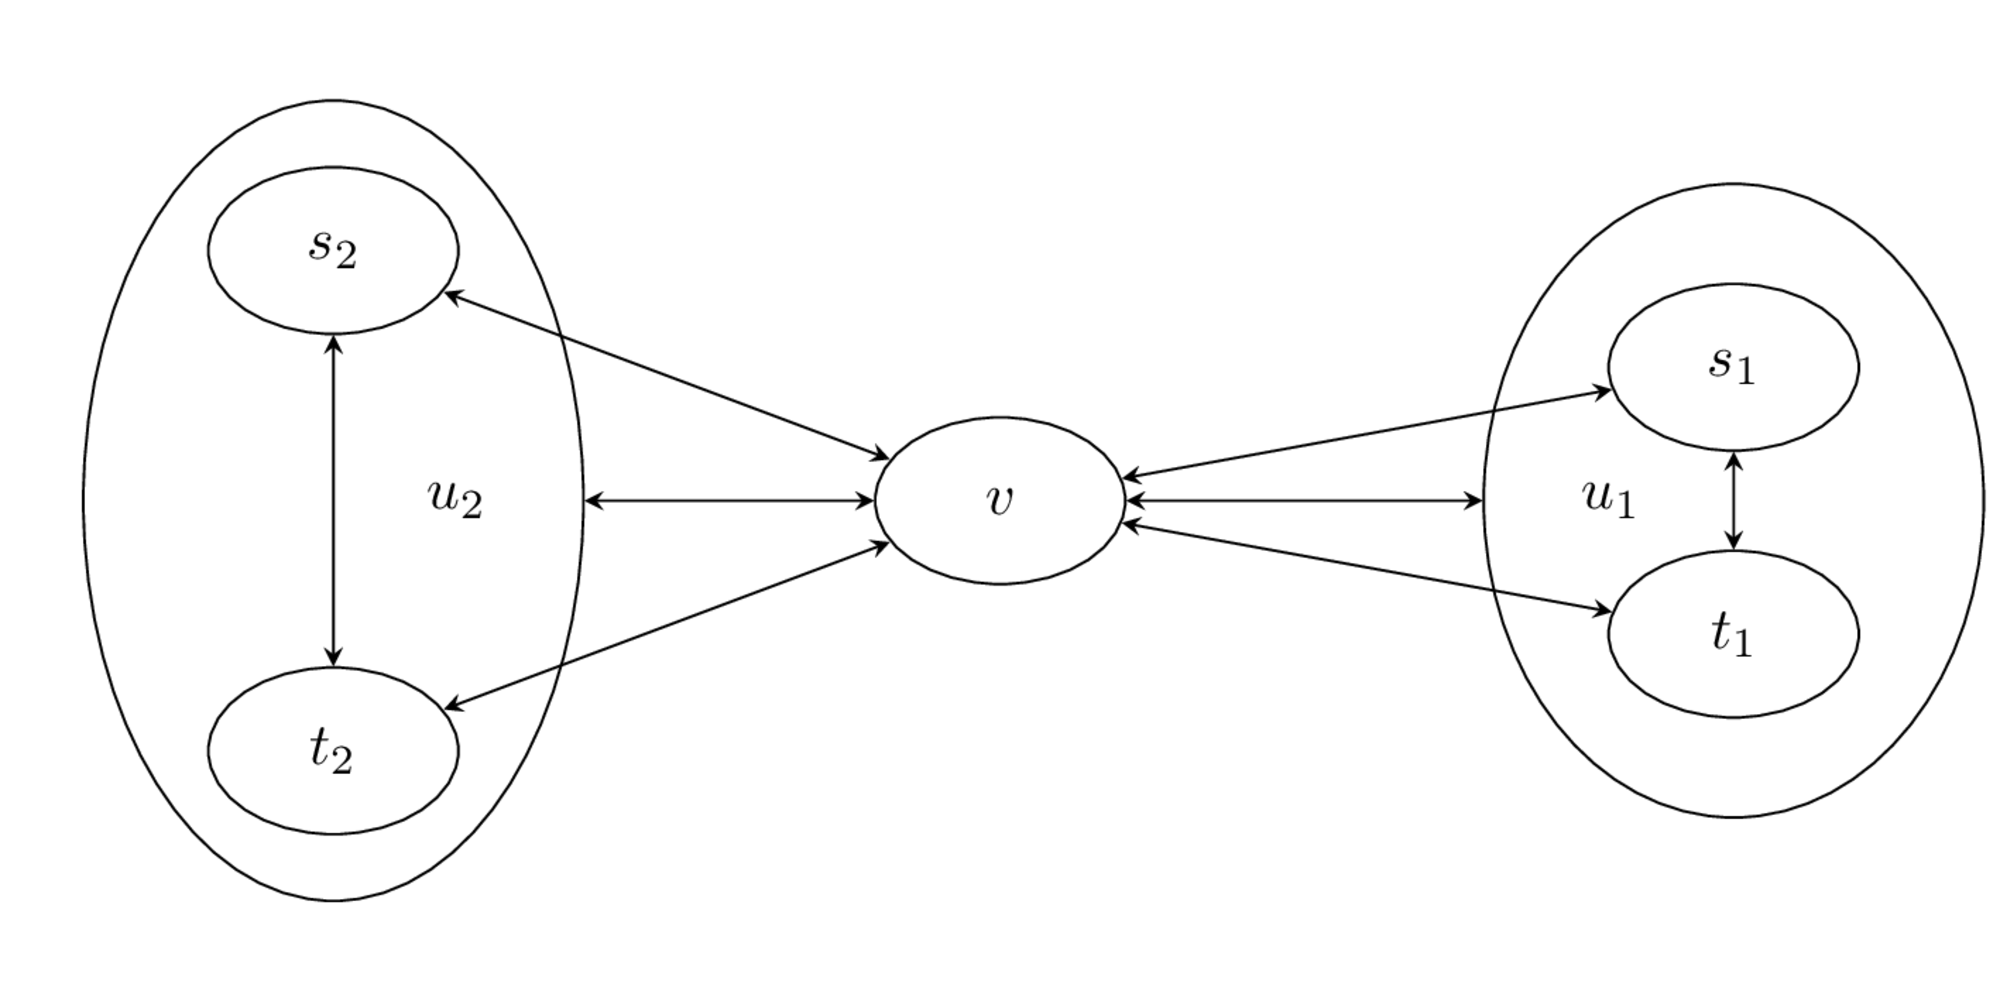

In [3]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (left bottom) at (-2, 0);
\coordinate (right top) at (10, 6);
\fill[white, use as bounding box] (left bottom) rectangle (right top);
\draw[help lines, white] (left bottom) grid (right top);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}
\tikzset{node/.style={draw, ellipse, minimum width=1.5cm, minimum height=1cm}}

\node[node] at (4,3) (v) {$v$};
\node[node] at (8.4,3.8) (s1) {$s_1$};
\node[node] at (8.4,2.2) (t1) {$t_1$};
\node[node, minimum width=3cm,, minimum height=3.8cm] at (8.4,3) (u1) {\hspace{-4em}$u_1$};
\node[node] at (0,4.5) (s2) {$s_2$};
\node[node] at (0,1.5) (t2) {$t_2$};
\node[node, minimum width=3cm,, minimum height=4.8cm] at (0,3) (u2) {\hspace{4em}$u_2$};
\draw[<->] (v) -- (u1);
\draw[<->] (v) -- (s1);
\draw[<->] (v) -- (t1);
\draw[<->] (s1) -- (t1);
\draw[<->] (v) -- (u2);
\draw[<->] (v) -- (s2);
\draw[<->] (v) -- (t2);
\draw[<->] (s2) -- (t2);

### scipy의 계층적 군집화

파이썬으로 계층적 군집화를 하려면 사이파이 패키지의 `linkage` 명령을 사용하거나 사이킷런 패키지의 `AgglomerativeClustering` 클래스를 사용한다. 각각 장단점이 있는데 사이파이 패키지는 군집화 결과를 트리 형태로 시각화해주는 `dendrogram` 명령도 지원한다.

MNIST digit 이미지 중 20개의 이미지를 무작위로 골라 계층적 군집화를 적용해보자.

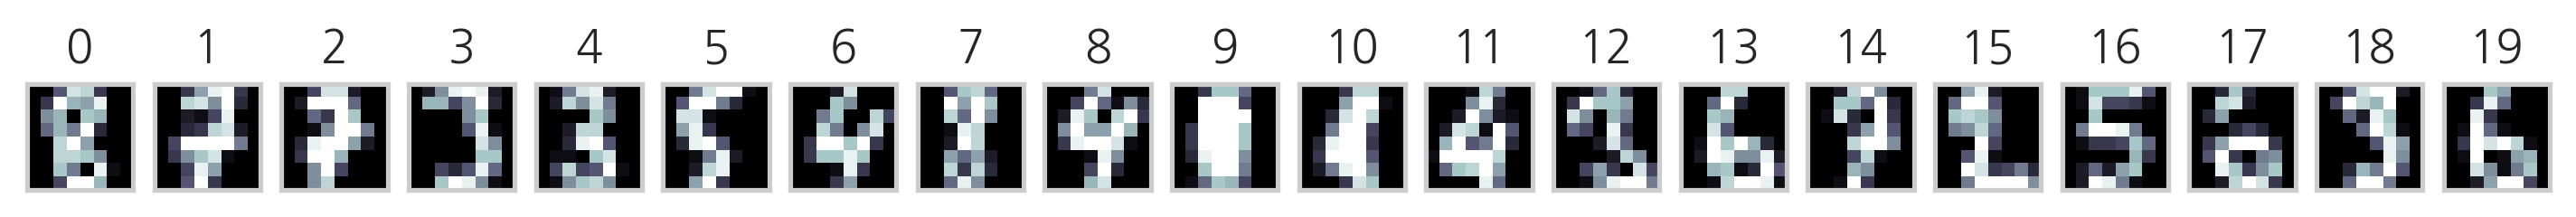

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))
for i in range(n_image):
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

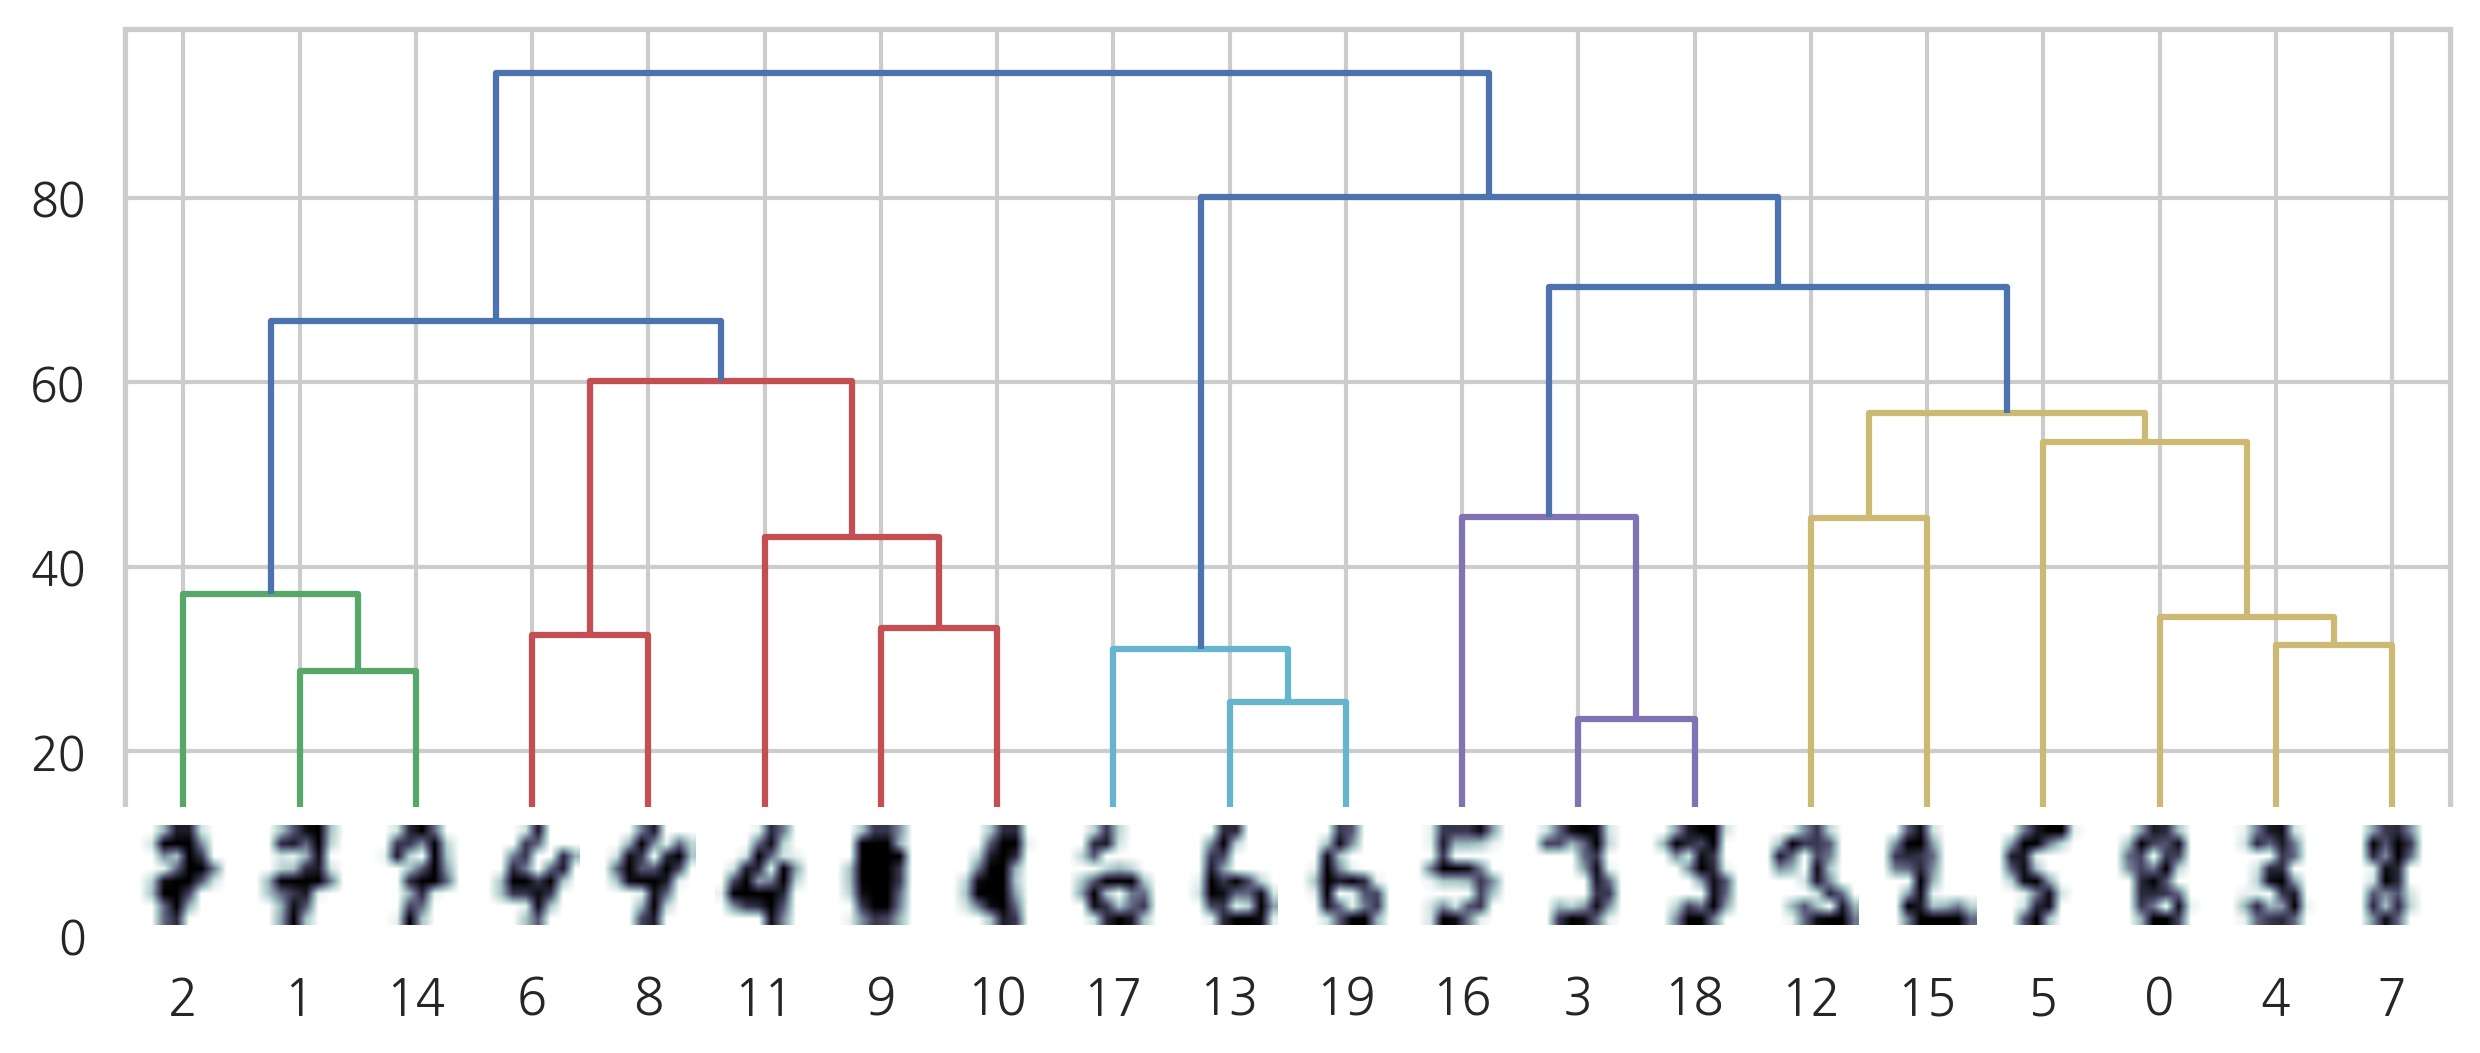

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.show()